In [30]:
!pip install -e ../Maccabee > /dev/null


# Normalization

(3.0068414180308376, 6.013682836061675)

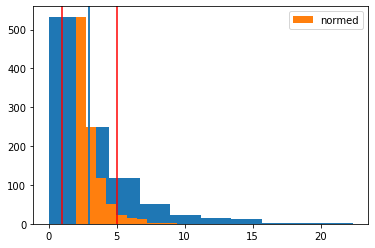

In [28]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.exponential(size=1000, scale=3)
# scaled_data = np.random.exponential(size=1000, scale=1)
plt.hist(data)
# plt.hist(scaled_data, label="scaled")
plt.axvline(x=np.mean(data))
normed_data = (data-np.mean(data))/np.std(data)
normed_data += 3
plt.hist(normed_data, label="normed")
plt.axvline(x=np.mean(normed_data))
plt.axvline(x=np.mean(normed_data) + 2*np.std(normed_data), c="r")
plt.axvline(x=np.mean(normed_data) - 2*np.std(normed_data), c="r")
plt.legend()
np.std(data), np.std(data*2)

In [27]:
np.std(normed_data)

1.0

In [11]:
import sys
sys.modules["multiprocessing"]

globals()["sys"]

<module 'sys' (built-in)>

In [9]:
a = np.empty(3)
a.__len__

<method-wrapper '__len__' of numpy.ndarray object at 0x7fcb7d86dcb0>

In [11]:
[].__len__

<method-wrapper '__len__' of list object at 0x7fcb63eee888>

In [12]:
class A():
    pass

A().__len__

AttributeError: 'A' object has no attribute '__len__'

In [100]:
def select_objects_given_probability(objects_to_sample, selection_probability):
    """Samples objects from `objects_to_sample` based on `selection_probability`.

    Args:
        objects_to_sample (list): List of objects to sample.
        selection_probability (list or float): The probability with which to sample objects from `objects_to_sample`. The value or values supplied should be between 0 and 1. If a list is supplied, it should be the same length as the list in `objects_to_sample` and will be the per-object selection probability. If float, then this is the selection probability for all objects. ``int(len(objects_to_sample)*selection_probability)`` objects will be sampled if this value is greater than 0. Otherwise the probability will be the selection probability for each item.

    Returns:
        :class:`numpy.ndarray`: An array of the selected objects.

    Examples
        >>> select_objects_given_probability(["a", "b", "c"], [0.5, 0.1, 0.001])
        ["a"]

        >>> select_objects_given_probability(["a", "b", "c"], 0.1)
        ["a"]
    """

    objects_to_sample = np.array(objects_to_sample)
    shape = objects_to_sample.shape
    assert(len(shape) == 1 or shape[1] == 1)

    objects_to_sample = objects_to_sample.flatten()
    n_objects = len(objects_to_sample)

    if hasattr(selection_probability, "__len__"):
        selections = np.random.uniform(size=n_objects) < selection_probability
    else:
        expected_num_to_select = int(n_objects*selection_probability)

        # If expected number is less than 1, fall back to per object sampling.
        if expected_num_to_select == 0:
            return select_objects_given_probability(
                objects_to_sample,
                np.full(n_objects, selection_probability))

        # else, proceed to select expected number.
        selections = np.random.choice(np.arange(len(objects_to_sample)),
            size=expected_num_to_select, replace=False)

    selected = objects_to_sample[selections]

    if len(shape) != 1:
        selected = selected.reshape((-1, 1))

    return selected

In [103]:
select_objects_given_probability(np.arange(11), np.random.random(11))

array([1, 2, 3, 4, 8, 9])

In [174]:
select_objects_given_probability(np.arange(11), 0.05)

array([], dtype=int64)

In [7]:
from sympy.abc import x, y
from sympy.utilities.autowrap import autowrap, binary_function, ufuncify, CodeWrapper
import pickle
import importlib

In [8]:
# cc = ufuncify(list(expr.free_symbols), expr)
# cc = autowrap(expr, args=list(expr.free_symbols))

In [14]:
expr = x * y + 1
mod_name = f"mod_{abs(hash(expr))}_{CodeWrapper._module_counter}"
CodeWrapper.module_name = mod_name
cc = ufuncify(list(expr.free_symbols), expr, tempdir="./c_code")

# mod = importlib.import_module(mod_name)
# dir(mod)
# func_name = next(filter(lambda x: x.startswith("wrapped"), dir(mod)))
f_data = (mod_name, "autofunc_c")

In [4]:
import numpy as np
np.random.randint(1e7)

9184891

In [16]:
f_data

('mod_6206980849027394656_1', 'autofunc_c')

In [6]:
f_data = ('mod_1453896700186991053_0', 'autofunc_c')
mod = importlib.import_module(f_data[0])
func = getattr(mod, f_data[1])
func(np.array([2, 4, 5], dtype="float"), np.array([3, 5, 8], dtype="float"))

array([ 7., 21., 41.])

In [7]:
def compiler(expression):
    
    expression_val = None

    free_symbols = getattr(expression, "free_symbols", None)

    if free_symbols is not None:
        expr_func_ordered_symbols = list(free_symbols)

        mod_name = f"mod_{abs(hash(expression))}_{CodeWrapper._module_counter}"
        CodeWrapper.module_name = mod_name
        compiled_func = ufuncify(expr_func_ordered_symbols, expression)

        mod = importlib.import_module(mod_name)
        func_name = next(filter(lambda x: x.startswith("wrapped"), dir(mod)))

        expr_data = (mod_name, func_name)
        expression_args = [str(symbol) for symbol in expr_func_ordered_symbols]
    else:
        # No free symbols, return expression itself.
        self.expression_val = expression


In [11]:
{1, 2, 3}.remove({1, 2})

KeyError: {1, 2}

In [17]:
import sys
list(filter(lambda x: x.startswith("mod_"), sys.modules.keys()))
mod = importlib.import_module("mod_4694703022551149035_1")
mod

<module 'mod_4694703022551149035_1' from '/tmp/tmp9u_5jtly_sympy_compile/mod_4694703022551149035_1.cpython-37m-x86_64-linux-gnu.so'>

In [19]:
dir(importlib)

['_RELOADING',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__import__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bootstrap',
 '_bootstrap_external',
 '_imp',
 '_r_long',
 '_w_long',
 'abc',
 'find_loader',
 'import_module',
 'invalidate_caches',
 'machinery',
 'reload',
 'sys',
 'types',
 'util',
 'warnings']

In [11]:
import wrapper_module_1
wrapper_module_1.autofunc_c(1, 2)

ModuleNotFoundError: No module named 'wrapper_module_1'

In [ ]:
class A:
    pass

a = A()
isinstance(a, A)

In [15]:
!ls c_code

build							   setup.py
mod_4694703022551149035_6.c				   wrapped_code_0.c
mod_4694703022551149035_6.cpython-37m-x86_64-linux-gnu.so  wrapped_code_0.h
mod_6206980849027394656_0.c				   wrapped_code_1.c
mod_6206980849027394656_0.cpython-37m-x86_64-linux-gnu.so  wrapped_code_1.h
mod_6206980849027394656_1.c				   wrapped_code_6.c
mod_6206980849027394656_1.cpython-37m-x86_64-linux-gnu.so  wrapped_code_6.h


In [ ]:
import importlib.util
spec = importlib.util.spec_from_file_location("mod_6206980849027394656_1", "./c_code/mod_6206980849027394656_1.cpython-37m-x86_64-linux-gnu.so")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
dir(foo)

In [1]:
import sys
sys.path.append('./c_code')
import mod_6206980849027394656_1
mod_6206980849027394656_1

<module 'mod_6206980849027394656_1' from './c_code/mod_6206980849027394656_1.cpython-37m-x86_64-linux-gnu.so'>

In [3]:
class A:
    def __init__(self, a, b):
        (self.a, self.b) = (a, b)

In [7]:
a = A(3, 2)
a.a

3

In [8]:
from multiprocessing import Pool
import time
def test(i):
    time.sleep(np.random.randint(1, 4))
    return i
with Pool(processes=8) as pool:
    res = pool.map(test, range(10))


In [9]:
res

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]